In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              zoom_range=0.2,
                              shear_range=0.2,
                              fill_mode='nearest')

In [4]:
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras import optimizers

In [19]:
# model = vgg16.VGG16(weights='imagenet', include_top=False, 
#                     input_shape=(150,150,3), pooling='max')
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)




model.compile(loss="categorical_crossentropy",
                      optimizer=adam,
                      metrics=["accuracy"])

In [20]:
# transfer_model.summary()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 28)      784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 28)        7084      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4644992   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [21]:
train_directory = 'datasets/training/training'
validation_directory = 'datasets/validation/validation'

In [22]:
## Getting the training and the validation sets
batch_size = 16
train_gen = image_gen.flow_from_directory(train_directory,target_size=(150,150),batch_size=batch_size,
                                         class_mode='categorical')

Found 1098 images belonging to 10 classes.


In [23]:
validation_gen = image_gen.flow_from_directory(validation_directory,target_size=(150,150),batch_size=batch_size,
                                         class_mode='categorical')

Found 272 images belonging to 10 classes.


In [37]:
history = model.fit_generator(train_gen,epochs=20,steps_per_epoch=1097//batch_size,
                             validation_data=validation_gen,validation_steps=272//batch_size)

# history = model.fit_generator(train_gen,epochs=10,
#                               validation_data=validation_gen)

Epoch 1/20
68/68 [==============================] - 26s 381ms/step - loss: 0.9458 - accuracy: 0.6784 - val_loss: 1.2976 - val_accuracy: 0.5588
Epoch 2/20
68/68 [==============================] - 28s 409ms/step - loss: 0.9830 - accuracy: 0.6516 - val_loss: 1.1241 - val_accuracy: 0.5882
Epoch 3/20
68/68 [==============================] - 26s 383ms/step - loss: 1.0022 - accuracy: 0.6488 - val_loss: 1.2132 - val_accuracy: 0.5809
Epoch 4/20
68/68 [==============================] - 29s 425ms/step - loss: 0.9298 - accuracy: 0.6701 - val_loss: 1.2027 - val_accuracy: 0.5772
Epoch 5/20
68/68 [==============================] - 30s 440ms/step - loss: 0.9531 - accuracy: 0.6719 - val_loss: 1.2495 - val_accuracy: 0.5699
Epoch 6/20
68/68 [==============================] - 27s 403ms/step - loss: 0.9067 - accuracy: 0.6821 - val_loss: 1.2207 - val_accuracy: 0.5846
Epoch 7/20
68/68 [==============================] - 27s 392ms/step - loss: 0.8876 - accuracy: 0.6922 - val_loss: 1.2403 - val_accuracy: 0.5735

In [14]:
#model.save('tlmonkeyCNN.h5')

In [38]:
_, acc = model.evaluate_generator(validation_gen, steps=272 //batch_size)

In [40]:
print('The testing accuracy for the CNN with the 10-Species-Monkey dataset is : %.3f' % (acc * 100.0))

The testing accuracy for the CNN with the 10-Species-Monkey dataset is : 58.088


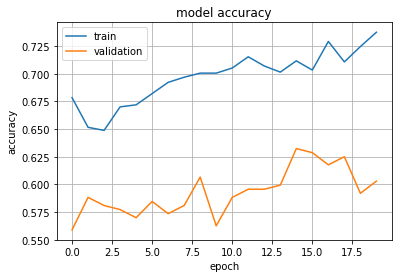

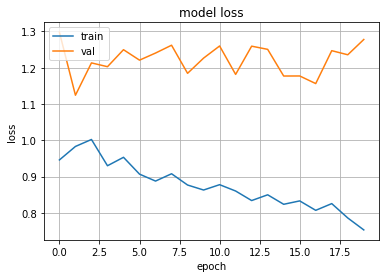

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
# plt.xlim([0,15])
# plt.ylim([0,1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()